<a href="https://colab.research.google.com/github/shcho11/00.ML_Practices_2022_School/blob/main/Modeling_AlzheimerDiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기계학습 모델링 제출과제 (2022-05-15) (조송현) 

### Instructions

1. Using `dataset.csv`, train the best model to perform the following tasks.

* ***Task 1*** (3-class Classification): Predict the diagnosis group of subjects
<br>Colum A (DX_bl): Diagnosis group of subject
<br>0: Cognitive normal
<br>1: Mild cognitive impairment
<br>2: Alzheimer’s disease

* ***Task 2*** (3-logit Regression): Predict the cognitive assessment scores of subjects
<br>Colum B (ADAS11): Alzheimer's Disease Assessment Scale (11 questions version)
<br>Colum C (ADAS13): Alzheimer's Disease Assessment Scale (13 questions version)
<br>Colum D (MMSE): Mini-Mental State Examination

2. Save the best model.

A minimal example code for your reference

```python
!wget https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib
from google.colab import files

train_df = pd.read_csv('dataset.csv')

X = train_df[[c for c in train_df.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE']]]
y = train_df['DX_bl']
y1  = train_df['ADAS11']
y2  = train_df['ADAS13']
y3  = train_df['MMSE']

X = X.fillna(0)

clf = RandomForestClassifier(random_state=42).fit(X, y)

reg1 = RandomForestRegressor(random_state=42).fit(X, y1)
reg2 = RandomForestRegressor(random_state=42).fit(X, y2)
reg3 = RandomForestRegressor(random_state=42).fit(X, y3)

joblib.dump(clf, 'clf.pkl', compress=1)
joblib.dump(reg1, 'reg1.pkl', compress=1)
joblib.dump(reg2, 'reg2.pkl', compress=1)
joblib.dump(reg3, 'reg3.pkl', compress=1)

files.download('clf.pkl')
files.download('reg1.pkl')
files.download('reg2.pkl')
files.download('reg3.pkl')
```



### Compile the below code to get the dataset!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!wget https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv

--2022-05-15 08:35:56--  https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1247513 (1.2M) [text/plain]
Saving to: ‘dataset.csv.3’

dataset.csv.3       100%[===================>]   1.19M  --.-KB/s    in 0.06s   

2022-05-15 08:35:57 (18.5 MB/s) - ‘dataset.csv.3’ saved [1247513/1247513]



In [ ]:
### START HERE !! ###

## 1. Task Definition

Task 1 (3-class Classification): <br>
Predict the probability of each class (Diagnosis group of subject) <br>

i. Colum A (DX_bl): Diagnosis group of subject <br>
0: Cognitive normal <br>
1: Mild cognitive impairment <br>
2: Alzheimer’s disease <br>

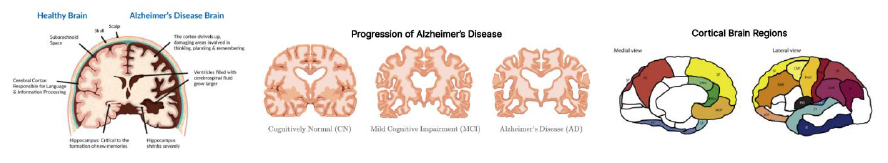

## 2. Collecting Data

* data source : https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv <br>
(already collected on upper lines)

## 3. EDA
* taking a look at the structure of dataset (using pandas.info()&describe() tool)
* exploring the distribution of label(DX_bl) data (including visualization)
* exploring missing values of each column

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/dataset.csv')

In [ ]:
pd.set_option('display.max_columns', None)
dataset

,DX_bl,ADAS11,ADAS13,MMSE,ST102CV,ST103CV,ST104CV,ST105CV,ST106CV,ST107CV,ST108CV,ST109CV,ST110CV,ST111CV,ST113CV,ST114CV,ST115CV,ST116CV,ST117CV,ST118CV,ST119CV,ST121CV,ST123CV,ST129CV,ST130CV,ST13CV,ST14CV,ST15CV,ST23CV,ST24CV,ST25CV,ST26CV,ST31CV,ST32CV,ST34CV,ST35CV,ST36CV,ST38CV,ST39CV,ST40CV,ST43CV,ST44CV,ST45CV,ST46CV,ST47CV,ST48CV,ST49CV,ST50CV,ST51CV,ST52CV,ST54CV,ST55CV,ST56CV,ST57CV,ST58CV,ST59CV,ST60CV,ST62CV,ST64CV,ST72CV,ST73CV,ST74CV,ST82CV,ST83CV,ST84CV,ST85CV,ST90CV,ST91CV,ST93CV,ST94CV,ST95CV,ST97CV,ST98CV,ST99CV,ST102TA,ST103TA,ST104TA,ST105TA,ST106TA,ST107TA,ST108TA,ST109TA,ST110TA,ST111TA,ST113TA,ST114TA,ST115TA,ST116TA,ST117TA,ST118TA,ST119TA,ST121TA,ST123TA,ST129TA,ST130TA,ST13TA,ST14TA,ST15TA,ST23TA,ST24TA,ST25TA,ST26TA,ST31TA,ST32TA,ST34TA,ST35TA,ST36TA,ST38TA,ST39TA,ST40TA,ST43TA,ST44TA,ST45TA,ST46TA,ST47TA,ST48TA,ST49TA,ST50TA,ST51TA,ST52TA,ST54TA,ST55TA,ST56TA,ST57TA,ST58TA,ST59TA,ST60TA,ST62TA,ST64TA,ST72TA,ST73TA,ST74TA,ST82TA,ST83TA,ST84TA,ST85TA,ST90TA,ST91TA,ST93TA,ST94TA,ST95TA,ST97TA,ST98TA,ST99TA
0,0,0.00,0.00,30,5010,2418,4905,2749,3689,2095,8339,2597,13974,11098,2568,18166,21299,13839,12905,9599,2020,1132,NaN,7014,8529,2852,1899,8395,2336,2237.0,794,11081,16456,10748,2676,14056,8466,7765,6140,12547,4093,2348.0,5545,2365,3712,1591,9944,2792,14904,11473,3131,18788,24431,13372,13341,13017,2211,1400,NaN,3245,2420,8831,3306,2468,944,11002,20826,11601,2901,13078,7883,8079,5464,11864,2.448,2.726,2.792,3.066,2.393,1.508,1.917,2.135,2.487,2.509,2.635,2.191,2.597,2.240,3.104,2.541,3.433,2.492,NaN,3.225,3.141,2.723,2.588,2.698,1.695,3.482,2.871,2.915,2.579,3.213,2.778,2.506,2.681,2.155,2.394,3.210,2.581,2.490,2.921,2.826,2.513,1.527,2.162,2.472,2.748,2.483,2.699,2.341,2.757,2.325,2.940,2.660,3.875,2.283,NaN,2.791,2.668,2.525,1.983,3.820,2.603,3.149,2.631,3.247,2.783,2.523,2.588,2.441,2.346,3.215
1,0,0.00,1.00,30,3422,1961,3596,2240,3269,2198,7510,3560,11134,8302,1564,11493,17937,10027,10146,10282,1890,874,6310.0,5808,6348,2515,1952,6096,2186,2067.0,584,9334,9197,8915,2291,8582,6303,6019,3413,8813,2788,1921.0,3794,1854,2775,1948,8029,3005,9572,8487,2078,11486,19014,9959,9268,9210,2258,1454,6418.0,2069,1935,5970,2109,1644,881,7109,14440,9099,1866,9473,5967,5148,4110,8987,2.349,2.587,2.699,2.932,2.603,1.587,1.985,2.698,2.577,2.324,2.945,2.442,2.818,2.275,2.951,2.591,3.617,2.758,1.192,2.984,3.046,2.329,3.251,2.576,1.848,3.406,2.686,2.954,2.390,2.842,2.968,2.130,2.668,1.877,2.276,2.771,2.134,2.349,2.622,2.837,2.698,1.689,1.967,2.657,2.261,2.104,2.911,2.422,2.753,2.214,2.540,2.559,3.448,2.352,1.230,2.616,3.067,2.629,1.638,3.565,2.556,2.570,2.448,2.697,3.004,2.080,2.561,1.854,2.467,2.947
2,0,1.00,1.00,29,5061,1829,3945,2793,5027,2913,10402,3416,16543,11766,2877,19690,23627,16493,12451,9758,3183,1096,NaN,7736,8110,3171,2075,7458,3393,2734.0,890,11739,14183,11321,2948,14008,8745,6370,7424,12723,4110,2189.0,5141,2847,3943,2484,10499,3341,16244,10899,3425,19406,24322,15493,14056,13725,3531,1364,NaN,2969,2011,6898,3190,2237,1268,10036,16899,12171,2398,12916,8304,6473,6248,12749,2.461,2.514,2.775,2.619,2.518,1.782,2.066,2.469,2.598,2.367,3.052,2.284,2.737,2.321,2.747,2.493,3.841,2.488,NaN,3.063,3.025,2.640,2.349,2.647,1.877,3.192,2.631,2.718,2.507,2.791,2.592,2.184,2.773,1.997,2.854,2.980,2.439,2.584,2.683,2.894,2.573,1.681,2.050,2.439,2.628,2.379,3.260,2.427,2.701,2.292,2.886,2.501,3.974,2.410,NaN,2.665,2.324,2.620,1.776,3.407,2.723,2.738,2.514,3.007,2.501,2.400,2.559,2.047,2.590,2.854
3,0,1.00,1.00,29,3574,1749,4072,2378,3045,2259,8112,2888,11407,9460,1824,14455,17981,12316,9439,9437,1847,670,NaN,6430,6664,2371,1072,5516,2673,1695.0,546,8603,12270,10112,2483,9375,6094,5956,4846,10730,3170,1729.0,3895,1691,2959,2160,8142,2698,11887,8696,2502,14682,20390,12830,10146,10765,2279,856,NaN,2459,2361,4905,2932,1932,797,8576,14829,10017,2412,9444,6074,6587,4672,12252,2.375,2.227,2.365,2.457,2.197,1.540,1.922,2.109,2.387,2.232,2.450,2.129,2.524,2.041,2.509,2.213,3.421,2.065,NaN,2.797,2.722,2.170,2.062,2.469,1.646,3.395,2

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Columns: 144 entries, DX_bl to ST99TA
dtypes: float64(76), int64(68)
memory usage: 1.8 MB


In [ ]:
dataset.describe()

,DX_bl,ADAS11,ADAS13,MMSE,ST102CV,ST103CV,ST104CV,ST105CV,ST106CV,ST107CV,ST108CV,ST109CV,ST110CV,ST111CV,ST113CV,ST114CV,ST115CV,ST116CV,ST117CV,ST118CV,ST119CV,ST121CV,ST123CV,ST129CV,ST130CV,ST13CV,ST14CV,ST15CV,ST23CV,ST24CV,ST25CV,ST26CV,ST31CV,ST32CV,ST34CV,ST35CV,ST36CV,ST38CV,ST39CV,ST40CV,ST43CV,ST44CV,ST45CV,ST46CV,ST47CV,ST48CV,ST49CV,ST50CV,ST51CV,ST52CV,ST54CV,ST55CV,ST56CV,ST57CV,ST58CV,ST59CV,ST60CV,ST62CV,ST64CV,ST72CV,ST73CV,ST74CV,ST82CV,ST83CV,ST84CV,ST85CV,ST90CV,ST91CV,ST93CV,ST94CV,ST95CV,ST97CV,ST98CV,ST99CV,ST102TA,ST103TA,ST104TA,ST105TA,ST106TA,ST107TA,ST108TA,ST109TA,ST110TA,ST111TA,ST113TA,ST114TA,ST115TA,ST116TA,ST117TA,ST118TA,ST119TA,ST121TA,ST123TA,ST129TA,ST130TA,ST13TA,ST14TA,ST15TA,ST23TA,ST24TA,ST25TA,ST26TA,ST31TA,ST32TA,ST34TA,ST35TA,ST36TA,ST38TA,ST39TA,ST40TA,ST43TA,ST44TA,ST45TA,ST46TA,ST47TA,ST48TA,ST49TA,ST50TA,ST51TA,ST52TA,ST54TA,ST55TA,ST56TA,ST57TA,ST58TA,ST59TA,ST60TA,ST62TA,ST64TA,ST72TA,ST73TA,ST74TA,ST82TA,ST83TA,ST84TA,ST85TA,ST90TA,ST91TA,ST93TA,ST94TA,ST95TA,ST97TA,ST98TA,ST99TA
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,760.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1606.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1606.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,760.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,760.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1606.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1606.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,760.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.00000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000
mean,0.889857,10.687623,16.838836,27.197884,3415.757312,1889.919104,3449.139390,2242.814561,3415.616055,2011.142502,7846.479776,2936.383945,11364.592408,8286.555694,1850.807716,13241.149347,18303.506534,11272.752334,9654.012446,8795.275669,1973.545737,778.663348,6454.726316,6077.756067,6185.471064,2221.753578,1726.772869,5499.126322,2536.539515,1743.722914,632.463597,8752.144368,10421.447418,9484.886123,2291.787181,10295.434972,6516.395146,5719.485999,4226.335408,9084.429994,3063.385190,2003.624533,4110.130056,1850.768513,2923.802116,1758.968264,8411.684505,2906.761045,11478.941506,8073.855009,2363.359676,12764.747978,19024.091475,11267.980709,10066.247666,9299.182950,2115.114499,1012.683883,6478.589474,2088.892346,1994.861232,5151.699440,2668.109521,1713.708152,841.360921,8490.422526,12671.380212,9325.728065,2109.915993,10298.728065,6345.311139,5849.720597,4266.591164,10252.002489,2.160143,2.518623,2.377479,2.526261,2.247253,1.453579,1.819296,2.391258,2.227340,2.143815,2.803263,2.148361,2.472519,1.995002,2.511118,2.319138,3.510285,2.173423,1.046057,2.859973,2.863737,2.253233,2.662427,2.329890,1.725495,3.160866,2.609811,2.538081,2.227268,2.655590,2.384760,2.019114,2.475054,1.821200,2.290044,2.648584,2.15

   Counts  Percentage
0     485        30.2
1     814        50.7
2     308        19.2


<function matplotlib.pyplot.show>

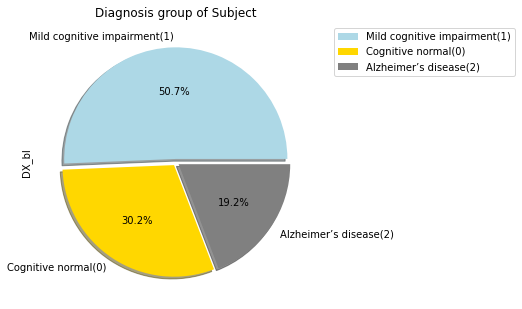

In [ ]:
# visualizing the distributution of label values

"""
Colum A (DX_bl): Diagnosis group of subject
0: Cognitive normal
1: Mild cognitive impairment
2: Alzheimer’s disease
"""

DX_bl_u = dataset['DX_bl'].unique()
df_DX_bl = pd.DataFrame(index=DX_bl_u, columns=['Counts', 'Percentage']).sort_index()
df_DX_bl['Counts'] = dataset.groupby('DX_bl')['DX_bl'].count()
df_DX_bl['Percentage'] = round((dataset.groupby('DX_bl')['DX_bl'].count()/dataset['DX_bl'].count()) * 100, 1)

labels = ['Mild cognitive impairment(1)', 'Cognitive normal(0)', 'Alzheimer’s disease(2)']
explode = [0.03, 0.03, 0.03]
colors = ['lightblue', 'gold', 'gray']

pie_DX_bl = dataset["DX_bl"].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, labels=labels, 
                                                       shadow=True, legend=True, explode=explode, figsize=(5,10))
plt.title('Diagnosis group of Subject')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

print(df_DX_bl)
plt.show

* finding out Columns with NaN values & Columns of Target values

1. Columns of almost all the values comprising of NaNs

  ST123CV    847 <br>
  ST64CV     847 <br>
  ST123TA    847 <br>
  ST64TA     847 <br>

2. label columns of other tasks (Predict the cognitive assessment scores of subjects)

  (ADAS11): Alzheimer's Disease Assessment Scale (11 questions version) <br>
  (ADAS13): Alzheimer's Disease Assessment Scale (13 questions version) <br>
  (MMSE): Mini-Mental State Examination <br>

3. label column of this task <br>
  DX_bl	


In [ ]:
#pd.set_option('display.max_rows', 10)
print("Columns with NaNs : ", dataset.columns[dataset.isnull().any()].tolist())
print(dataset.isnull().sum())

Columns with NaNs :  ['ST123CV', 'ST24CV', 'ST44CV', 'ST64CV', 'ST123TA', 'ST24TA', 'ST44TA', 'ST64TA']
DX_bl      0
ADAS11     0
ADAS13     0
MMSE       0
ST102CV    0
          ..
ST94TA     0
ST95TA     0
ST97TA     0
ST98TA     0
ST99TA     0
Length: 144, dtype: int64


In [ ]:
data = dataset.drop(columns=["ADAS11","ADAS13","MMSE","ST123CV","ST64CV","ST123TA","ST64TA"])

print("Columns with NaNs after Drop : ", data.columns[data.isnull().any()].tolist())
data.head()

Columns with NaNs after Drop :  ['ST24CV', 'ST44CV', 'ST24TA', 'ST44TA']


,DX_bl,ST102CV,ST103CV,ST104CV,ST105CV,ST106CV,ST107CV,ST108CV,ST109CV,ST110CV,ST111CV,ST113CV,ST114CV,ST115CV,ST116CV,ST117CV,ST118CV,ST119CV,ST121CV,ST129CV,ST130CV,ST13CV,ST14CV,ST15CV,ST23CV,ST24CV,ST25CV,ST26CV,ST31CV,ST32CV,ST34CV,ST35CV,ST36CV,ST38CV,ST39CV,ST40CV,ST43CV,ST44CV,ST45CV,ST46CV,ST47CV,ST48CV,ST49CV,ST50CV,ST51CV,ST52CV,ST54CV,ST55CV,ST56CV,ST57CV,ST58CV,ST59CV,ST60CV,ST62CV,ST72CV,ST73CV,ST74CV,ST82CV,ST83CV,ST84CV,ST85CV,ST90CV,ST91CV,ST93CV,ST94CV,ST95CV,ST97CV,ST98CV,ST99CV,ST102TA,ST103TA,ST104TA,ST105TA,ST106TA,ST107TA,ST108TA,ST109TA,ST110TA,ST111TA,ST113TA,ST114TA,ST115TA,ST116TA,ST117TA,ST118TA,ST119TA,ST121TA,ST129TA,ST130TA,ST13TA,ST14TA,ST15TA,ST23TA,ST24TA,ST25TA,ST26TA,ST31TA,ST32TA,ST34TA,ST35TA,ST36TA,ST38TA,ST39TA,ST40TA,ST43TA,ST44TA,ST45TA,ST46TA,ST47TA,ST48TA,ST49TA,ST50TA,ST51TA,ST52TA,ST54TA,ST55TA,ST56TA,ST57TA,ST58TA,ST59TA,ST60TA,ST62TA,ST72TA,ST73TA,ST74TA,ST82TA,ST83TA,ST84TA,ST85TA,ST90TA,ST91TA,ST93TA,ST94TA,ST95TA,ST97TA,ST98TA,ST99TA
0,0,5010,2418,4905,2749,3689,2095,8339,2597,13974,11098,2568,18166,21299,13839,12905,9599,2020,1132,7014,8529,2852,1899,8395,2336,2237.0,794,11081,16456,10748,2676,14056,8466,7765,6140,12547,4093,2348.0,5545,2365,3712,1591,9944,2792,14904,11473,3131,18788,24431,13372,13341,13017,2211,1400,3245,2420,8831,3306,2468,944,11002,20826,11601,2901,13078,7883,8079,5464,11864,2.448,2.726,2.792,3.066,2.393,1.508,1.917,2.135,2.487,2.509,2.635,2.191,2.597,2.240,3.104,2.541,3.433,2.492,3.225,3.141,2.723,2.588,2.698,1.695,3.482,2.871,2.915,2.579,3.213,2.778,2.506,2.681,2.155,2.394,3.210,2.581,2.490,2.921,2.826,2.513,1.527,2.162,2.472,2.748,2.483,2.699,2.341,2.757,2.325,2.940,2.660,3.875,2.283,2.791,2.668,2.525,1.983,3.820,2.603,3.149,2.631,3.247,2.783,2.523,2.588,2.441,2.346,3.215
1,0,3422,1961,3596,2240,3269,2198,7510,3560,11134,8302,1564,11493,17937,10027,10146,10282,1890,874,5808,6348,2515,1952,6096,2186,2067.0,584,9334,9197,8915,2291,8582,6303,6019,3413,8813,2788,1921.0,3794,1854,2775,1948,8029,3005,9572,8487,2078,11486,19014,9959,9268,9210,2258,1454,2069,1935,5970,2109,1644,881,7109,14440,9099,1866,9473,5967,5148,4110,8987,2.349,2.587,2.699,2.932,2.603,1.587,1.985,2.698,2.577,2.324,2.945,2.442,2.818,2.275,2.951,2.591,3.617,2.758,2.984,3.046,2.329,3.251,2.576,1.848,3.406,2.686,2.954,2.390,2.842,2.968,2.130,2.668,1.877,2.276,2.771,2.134,2.349,2.622,2.837,2.698,1.689,1.967,2.657,2.261,2.104,2.911,2.422,2.753,2.214,2.540,2.559,3.448,2.352,2.616,3.067,2.629,1.638,3.565,2.556,2.570,2.448,2.697,3.004,2.080,2.561,1.854,2.467,2.947
2,0,5061,1829,3945,2793,5027,2913,10402,3416,16543,11766,2877,19690,23627,16493,12451,9758,3183,1096,7736,8110,3171,2075,7458,3393,2734.0,890,11739,14183,11321,2948,14008,8745,6370,7424,12723,4110,2189.0,5141,2847,3943,2484,10499,3341,16244,10899,3425,19406,24322,15493,14056,13725,3531,1364,2969,2011,6898,3190,2237,1268,10036,16899,12171,2398,12916,8304,6473,6248,12749,2.461,2.514,2.775,2.619,2.518,1.782,2.066,2.469,2.598,2.367,3.052,2.284,2.737,2.321,2.747,2.493,3.841,2.488,3.063,3.025,2.640,2.349,2.647,1.877,3.192,2.631,2.718,2.507,2.791,2.592,2.184,2.773,1.997,2.854,2.980,2.439,2.584,2.683,2.894,2.573,1.681,2.050,2.439,2.628,2.379,3.260,2.427,2.701,2.292,2.886,2.501,3.974,2.410,2.665,2.324,2.620,1.776,3.407,2.723,2.738,2.514,3.007,2.501,2.400,2.559,2.047,2.590,2.854
3,0,3574,1749,4072,2378,3045,2259,8112,2888,11407,9460,1824,14455,17981,12316,9439,9437,1847,670,6430,6664,2371,1072,5516,2673,1695.0,546,8603,12270,10112,2483,9375,6094,5956,4846,10730,3170,1729.0,3895,1691,2959,2160,8142,2698,11887,8696,2502,14682,20390,12830,10146,10765,2279,856,2459,2361,4905,2932,1932,797,8576,14829,10017,2412,9444,6074,6587,4672,12252,2.375,2.227,2.365,2.457,2.197,1.540,1.922,2.109,2.387,2.232,2.450,2.129,2.524,2.041,2.509,2.213,3.421,2.065,2.797,2.722,2.170,2.062,2.469,1.646,3.395,2.279,2.564,2.247,2.586,2.037,2.043,2.382,1.771,2.153,2.648,2.383,2.100,2.232,2.381,2.176,1.516,1.837,2.332,2.479,2.112,2.496,2.244,2.626,2.076,2.546,2.279,3.788,2.057,2.45

## 4. Split Dataset
* using train_test_split tool of scikit-learn (train:test ratio of 7:3)

In [ ]:
# x and y
x = data.drop(columns=["DX_bl"]).copy()
y = data["DX_bl"].copy()

# data split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

* replacing NaN values of each column with mean values 

In [ ]:
train_x['ST24CV'].fillna((train_x['ST24CV'].mean()), inplace=True)
train_x['ST44CV'].fillna((train_x['ST44CV'].mean()), inplace=True)
train_x['ST24TA'].fillna((train_x['ST24TA'].mean()), inplace=True)
train_x['ST44TA'].fillna((train_x['ST44TA'].mean()), inplace=True)

test_x['ST24CV'].fillna((test_x['ST24CV'].mean()), inplace=True)
test_x['ST44CV'].fillna((test_x['ST44CV'].mean()), inplace=True)
test_x['ST24TA'].fillna((test_x['ST24TA'].mean()), inplace=True)
test_x['ST44TA'].fillna((test_x['ST44TA'].mean()), inplace=True)

print("Columns with NaNs (train) : ", train_x.columns[train_x.isnull().any()].tolist())
print("Columns with NaNs (test) : ", test_x.columns[test_x.isnull().any()].tolist())

Columns with NaNs (train) :  []
Columns with NaNs (test) :  []


In [ ]:
#pd.set_option('display.max_rows', 10)
train_x.isnull().sum()

ST102CV    0
ST103CV    0
ST104CV    0
ST105CV    0
ST106CV    0
          ..
ST94TA     0
ST95TA     0
ST97TA     0
ST98TA     0
ST99TA     0
Length: 136, dtype: int64

## 5 .Scaling
* using MinMaxScaler of scikit-learn, scaling values to (0 to 1) range
  <br> (in order to deal with absolute differences of value size)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

minmax_scaler = MinMaxScaler(feature_range=(0,1.))
train_xs = pd.DataFrame(minmax_scaler.fit_transform(train_x), columns = train_x.columns).copy()
test_xs = pd.DataFrame(minmax_scaler.fit_transform(test_x), columns = test_x.columns).copy()

In [ ]:
train_xs.head()

,ST102CV,ST103CV,ST104CV,ST105CV,ST106CV,ST107CV,ST108CV,ST109CV,ST110CV,ST111CV,ST113CV,ST114CV,ST115CV,ST116CV,ST117CV,ST118CV,ST119CV,ST121CV,ST129CV,ST130CV,ST13CV,ST14CV,ST15CV,ST23CV,ST24CV,ST25CV,ST26CV,ST31CV,ST32CV,ST34CV,ST35CV,ST36CV,ST38CV,ST39CV,ST40CV,ST43CV,ST44CV,ST45CV,ST46CV,ST47CV,ST48CV,ST49CV,ST50CV,ST51CV,ST52CV,ST54CV,ST55CV,ST56CV,ST57CV,ST58CV,ST59CV,ST60CV,ST62CV,ST72CV,ST73CV,ST74CV,ST82CV,ST83CV,ST84CV,ST85CV,ST90CV,ST91CV,ST93CV,ST94CV,ST95CV,ST97CV,ST98CV,ST99CV,ST102TA,ST103TA,ST104TA,ST105TA,ST106TA,ST107TA,ST108TA,ST109TA,ST110TA,ST111TA,ST113TA,ST114TA,ST115TA,ST116TA,ST117TA,ST118TA,ST119TA,ST121TA,ST129TA,ST130TA,ST13TA,ST14TA,ST15TA,ST23TA,ST24TA,ST25TA,ST26TA,ST31TA,ST32TA,ST34TA,ST35TA,ST36TA,ST38TA,ST39TA,ST40TA,ST43TA,ST44TA,ST45TA,ST46TA,ST47TA,ST48TA,ST49TA,ST50TA,ST51TA,ST52TA,ST54TA,ST55TA,ST56TA,ST57TA,ST58TA,ST59TA,ST60TA,ST62TA,ST72TA,ST73TA,ST74TA,ST82TA,ST83TA,ST84TA,ST85TA,ST90TA,ST91TA,ST93TA,ST94TA,ST95TA,ST97TA,ST98TA,ST99TA
0,0.236805,0.370697,0.223977,0.370355,0.335621,0.399061,0.160055,0.280034,0.301205,0.111642,0.152131,0.245992,0.471474,0.071481,0.318334,0.174798,0.289299,0.301517,0.351157,0.178622,0.270536,0.416306,0.132366,0.484336,0.305859,0.240938,0.264109,0.198068,0.407088,0.175213,0.330306,0.542242,0.441358,0.186293,0.317149,0.159971,0.399449,0.168066,0.566388,0.466360,0.313439,0.203787,0.206764,0.182416,0.153654,0.256476,0.262534,0.468766,0.154305,0.342966,0.193516,0.285011,0.260355,0.320708,0.214631,0.144550,0.303552,0.249593,0.029840,0.314959,0.252750,0.358857,0.212255,0.257990,0.395073,0.336129,0.131622,0.338719,0.349462,0.528832,0.361905,0.340169,0.312069,0.329812,0.382434,0.618895,0.548567,0.437400,0.334882,0.734165,0.645137,0.365657,0.644754,0.557288,0.604815,0.399880,0.582237,0.438095,0.453061,0.562444,0.610480,0.643592,0.684193,0.235663,0.566770,0.442733,0.719560,0.509333,0.681241,0.621725,0.514733,0.315108,0.636872,0.459801,0.367770,0.394757,0.535446,0.385596,0.190693,0.421826,0.567164,0.454164,0.432006,0.501397,0.560660,0.556272,0.472441,0.566787,0.471609,0.416696,0.436224,0.615995,0.499211,0.545455,0.445135,0.550839,0.252356,0.596966,0.535004,0.666051,0.600621,0.397607,0.410545,0.331707,0.269084,0.664042
1,0.449929,0.516413,0.352807,0.518579,0.539465,0.368725,0.498694,0.548424,0.376262,0.344259,0.500656,0.449696,0.444041,0.574941,0.456776,0.565943,0.562914,0.507583,0.453654,0.442184,0.299339,0.505051,0.394752,0.465539,0.325389,0.292111,0.666532,0.407177,0.423182,0.278311,0.604394,0.532051,0.651313,0.082239,0.373630,0.473052,0.431720,0.249161,0.277159,0.341880,0.492070,0.472527,0.434089,0.429911,0.526046,0.439510,0.423925,0.544559,0.460790,0.459387,0.476309,0.385372,0.642012,0.759646,0.633494,0.467765,0.427094,0.297165,0.335184,0.544877,0.487096,0.517939,0.353758,0.473671,0.547810,0.282120,0.255147,0.539150,0.547043,0.440611,0.673993,0.583233,0.754310,0.212441,0.412626,0.563625,0.619147,0.595506,0.444032,0.580614,0.496960,0.461953,0.533865,0.664848,0.675120,0.543335,0.411842,0.512245,0.373178,0.606020,0.558081,0.431244,0.524772,0.424096,0.486801,0.620898,0.525907,0.542667,0.580395,0.421086,0.472376,0.307914,0.614525,0.704319,0.296247,0.508867,0.420516,0.653413,0.282847,0.444911,0.515672,0.487754,0.467318,0.436220,0.551328,0.512545,0.562634,0.542238,0.476341,0.432260,0.598214,0.644415,0.574961,0.611570,0.273292,0.501109,0.384293,0.498021,0.584377,0.570548,0.590683,0.494018,0.453760,0.310244,0.381679,0.644357
2,0.320399,0.325460,0.432160,0.427521,0.226950,0.316721,0.362517,0.330304,0.373575,0.263685,0.339344,0.378248,0.420238,0.404054,0.521508,0.376351,0.412339,0.280107,0.351310,0.292827,0.261148,0.233766,0.445324,0.502820,0.257200,0.331557,0.415649,0.389061,0.357137,0.322183,0.393876,0.448389,0.454145,0.335135,0.446414,0.285644,0.360882,0.443418,0.356082,0.389218,0.616861,0.242445,0.156034,0.499960,0.329353,0.194421,0.382406,0.470816,0.365034,0.550801,0.344339,0.370941,0.220414,0.512920,0.281842,0.575166,0.458643,0.248289,0.626648,0.438247,0.391545,0.41

## Modeling
* Because this task's goal is to classify 3 diagnostic groups of subject, some kinds of (single or ensemble) models for classification is tested below
* Models performed : decision tree, k neighbors, support vector, random forest, xgboost, adaboost (to binary classification model e.g. SVM, OvO or OvA is automatically applied by scikit-learn)
* Evaluations with Accuracy score, Confusion matrix, Classification report by sklearn metrics tool

In [ ]:
#importing all the required ML packages
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# 1. Decision Tree Classifier

dtmodel=DecisionTreeClassifier(random_state = 42)
dtmodel.fit(train_xs,train_y)
predictdt_tr = dtmodel.predict(train_xs)
predictdt = dtmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predictdt_tr)))
print("\n")
print(confusion_matrix(test_y, predictdt))
print(classification_report(test_y, predictdt))
print("accuracy score(test) : ",(accuracy_score(test_y, predictdt)))

accuracy score(train) :  1.0


[[ 73  66  14]
 [102 110  31]
 [ 13  49  25]]
              precision    recall  f1-score   support

           0       0.39      0.48      0.43       153
           1       0.49      0.45      0.47       243
           2       0.36      0.29      0.32        87

    accuracy                           0.43       483
   macro avg       0.41      0.41      0.41       483
weighted avg       0.43      0.43      0.43       483

accuracy score(test) :  0.4306418219461698


In [ ]:
# 2. Random Forest

rfmodel=RandomForestClassifier(n_estimators=200, random_state=42)
rfmodel.fit(train_xs,train_y)
predictrf_tr = rfmodel.predict(train_xs)
predictrf = rfmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predictrf_tr)))
print("\n")
print(confusion_matrix(test_y, predictrf))
print(classification_report(test_y, predictrf))
print("accuracy score(test) : ",(accuracy_score(test_y, predictrf)))

accuracy score(train) :  1.0


[[ 62  91   0]
 [ 60 167  16]
 [  6  54  27]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.44       153
           1       0.54      0.69      0.60       243
           2       0.63      0.31      0.42        87

    accuracy                           0.53       483
   macro avg       0.55      0.47      0.49       483
weighted avg       0.54      0.53      0.52       483

accuracy score(test) :  0.5300207039337475


In [ ]:
# 3. Linear-SVM

svmodel=svm.SVC(probability=True, random_state=42)
svmodel.fit(train_xs,train_y)
predictsv_tr = svmodel.predict(train_xs)
predictsv = svmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predictsv_tr)))
print("\n")
print(confusion_matrix(test_y, predictsv))
print(classification_report(test_y, predictsv))
print("accuracy score(test) : ",(accuracy_score(test_y, predictsv)))

accuracy score(train) :  0.7491103202846975


[[ 44 107   2]
 [ 50 173  20]
 [  2  46  39]]
              precision    recall  f1-score   support

           0       0.46      0.29      0.35       153
           1       0.53      0.71      0.61       243
           2       0.64      0.45      0.53        87

    accuracy                           0.53       483
   macro avg       0.54      0.48      0.50       483
weighted avg       0.53      0.53      0.51       483

accuracy score(test) :  0.5300207039337475


In [ ]:
# 4. K-Nearest Neighbors

knmodel=KNeighborsClassifier() 
knmodel.fit(train_xs,train_y)
predictkn_tr = knmodel.predict(train_xs)
predictkn = knmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predictkn_tr)))
print("\n")
print(confusion_matrix(test_y, predictkn))
print(classification_report(test_y, predictkn))
print("accuracy score(test) : ",(accuracy_score(test_y, predictkn)))

accuracy score(train) :  0.645017793594306


[[ 78  75   0]
 [ 86 147  10]
 [ 17  54  16]]
              precision    recall  f1-score   support

           0       0.43      0.51      0.47       153
           1       0.53      0.60      0.57       243
           2       0.62      0.18      0.28        87

    accuracy                           0.50       483
   macro avg       0.53      0.43      0.44       483
weighted avg       0.52      0.50      0.48       483

accuracy score(test) :  0.4989648033126294


In [ ]:
# 5. Xgboost

xgmodel=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgmodel.fit(train_xs,train_y)
predictxg_tr = xgmodel.predict(train_xs)
predictxg = xgmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predictxg_tr)))
print("\n")
print(confusion_matrix(test_y, predictxg))
print(classification_report(test_y, predictxg))
print("accuracy score(test) : ",(accuracy_score(test_y, predictxg)))

accuracy score(train) :  0.9991103202846975


[[ 80  73   0]
 [ 84 137  22]
 [  5  49  33]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.50       153
           1       0.53      0.56      0.55       243
           2       0.60      0.38      0.46        87

    accuracy                           0.52       483
   macro avg       0.53      0.49      0.50       483
weighted avg       0.52      0.52      0.52       483

accuracy score(test) :  0.5175983436853002


In [ ]:
# 6. Adaboost

adamodel=AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
adamodel.fit(train_xs,train_y)
predictada_tr = adamodel.predict(train_xs)
predictada = adamodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predictada_tr)))
print("\n")
print(confusion_matrix(test_y, predictada))
print(classification_report(test_y, predictada))
print("accuracy score(test) : ",(accuracy_score(test_y, predictada)))

accuracy score(train) :  0.5916370106761566


[[ 58  95   0]
 [ 65 163  15]
 [  3  56  28]]
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       153
           1       0.52      0.67      0.59       243
           2       0.65      0.32      0.43        87

    accuracy                           0.52       483
   macro avg       0.54      0.46      0.48       483
weighted avg       0.52      0.52      0.50       483

accuracy score(test) :  0.515527950310559


## Cross Validation
* cross-validating using k-fold metric (k=10)

In [ ]:
from sklearn.model_selection import KFold #K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Decision Tree', 'Random Forest','Linear SVM','KNN', 'Xgboost', 'Adaboost']

models=[dtmodel, rfmodel, svmodel, knmodel, xgmodel, adamodel]

for i in models:
    model = i
    cv_result = cross_val_score(model, train_xs, train_y, cv=kfold, scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

newmodels_df = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
newmodels_df

,CV Mean,Std
Decision Tree,0.467099,0.044147
Random Forest,0.531092,0.043049
Linear SVM,0.532009,0.033351
KNN,0.477773,0.045469
Xgboost,0.515107,0.045413
Adaboost,0.545314,0.042489


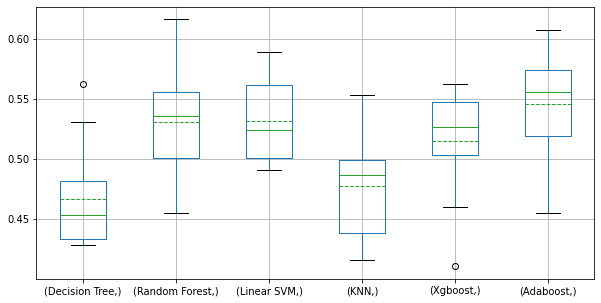

In [ ]:
plt.subplots(figsize=(10,5))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot(meanline=True, showmeans=True)

## Hyperparameters Tuning
* using GridSearch tool, finding out best hyperparameters of Random Forest and Linear SVM model

* for Random Forest model

In [ ]:
rfmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [200, 300, 400]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)

# Fitting
grid_search.fit(train_xs, train_y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [200, 300, 400]})

In [ ]:
print("Best Parameters : \n", grid_search.best_params_)
print("Best Scroe : \n",grid_search.best_score_)

Best Parameters : 
 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best Scroe : 
 0.5364484126984126


In [ ]:
# Random Forest after Hyperparameters Tuned

trfmodel=RandomForestClassifier(n_estimators=200, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, random_state=42)
trfmodel.fit(train_xs,train_y)
predicttrf_tr = trfmodel.predict(train_xs)
predicttrf = trfmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predicttrf_tr)))
print("\n")
print(confusion_matrix(test_y, predicttrf))
print(classification_report(test_y, predicttrf))
print("accuracy score(test) : ",(accuracy_score(test_y, predicttrf)))

accuracy score(train) :  0.9839857651245552


[[ 34 118   1]
 [ 25 205  13]
 [  2  65  20]]
              precision    recall  f1-score   support

           0       0.56      0.22      0.32       153
           1       0.53      0.84      0.65       243
           2       0.59      0.23      0.33        87

    accuracy                           0.54       483
   macro avg       0.56      0.43      0.43       483
weighted avg       0.55      0.54      0.49       483

accuracy score(test) :  0.5362318840579711


* for Linear SVM model

In [ ]:
svmodel.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
C=[0.1,0.25,0.5,0.75,1,2,5,10]
gamma=[0.1,0.25,0.5,0.75,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}

grid_search2 = GridSearchCV(estimator = svm.SVC(),param_grid=hyper,verbose=True)

# Fitting
grid_search2.fit(train_xs, train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 5, 10],
                         'gamma': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [ ]:
print("Best Parameters : \n", grid_search2.best_params_)
print("Best Scroe : \n",grid_search2.best_score_)
print("Best Estimator : \n",grid_search2.best_estimator_)

Best Parameters : 
 {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Scroe : 
 0.5453690476190476
Best Estimator : 
 SVC(C=2, gamma=0.1)


In [ ]:
# Linear-SVM Classifier after Hyperparameters tuned

tsvmodel=svm.SVC(C=2, gamma=0.1, kernel='rbf', probability=True)
tsvmodel.fit(train_xs,train_y)
predicttsv_tr = tsvmodel.predict(train_xs)
predicttsv = tsvmodel.predict(test_xs)

# Evaluation
print("accuracy score(train) : ",(accuracy_score(train_y, predicttsv_tr)))
print("\n")
print(confusion_matrix(test_y, predicttsv))
print(classification_report(test_y, predicttsv))
print("accuracy score(test) : ",(accuracy_score(test_y, predicttsv)))

accuracy score(train) :  0.702846975088968


[[ 62  89   2]
 [ 64 154  25]
 [  6  30  51]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       153
           1       0.56      0.63      0.60       243
           2       0.65      0.59      0.62        87

    accuracy                           0.55       483
   macro avg       0.56      0.54      0.55       483
weighted avg       0.55      0.55      0.55       483

accuracy score(test) :  0.5527950310559007


In [ ]:
prob = tsvmodel.predict_proba(test_xs)
prob

array([[0.37743784, 0.45440137, 0.16816079],
       [0.43619227, 0.50684425, 0.05696348],
       [0.49297308, 0.44905808, 0.05796884],
       ...,
       [0.1877938 , 0.60208804, 0.21011816],
       [0.22906824, 0.44362237, 0.32730939],
       [0.30975276, 0.56469768, 0.12554956]])

In [ ]:
import joblib
import pickle

filename = 'saved_tsv.pkl'
joblib.dump(tsvmodel, filename, compress=1)

['saved_tsv.pkl']

In [ ]:
from google.colab import files
files.download('saved_tsv.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded = joblib.load(filename)

result = loaded.score(test_xs, test_y)
print(result)

0.5527950310559007
